In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import The Limited Power Dataset

In [3]:
df1=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Lim_solar_data.csv')
df2=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Max_solar_data.csv')

df1.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


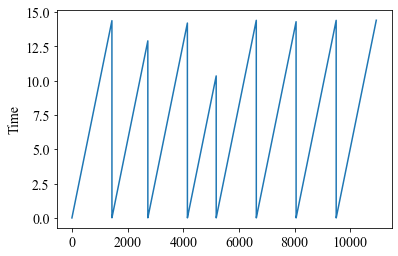

In [11]:
plt.plot(df1['Time'])
plt.ylabel('Time')
plt.show()

# Plot a Pie Chart for samples from each fault class

In [26]:
df1['label'].value_counts()

F7L    1441
F6L    1440
F4L    1440
F0L    1438
F5L    1430
F2L    1421
F1L    1290
F3L    1035
Name: label, dtype: int64

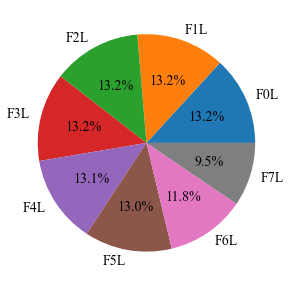

In [13]:
fig = plt.figure(1, figsize=(5,5))
plt.pie(df1['label'].value_counts(),labels =df1['label'].unique(),autopct='%2.1f%%')
plt.show()

# Show a correlation heatmap

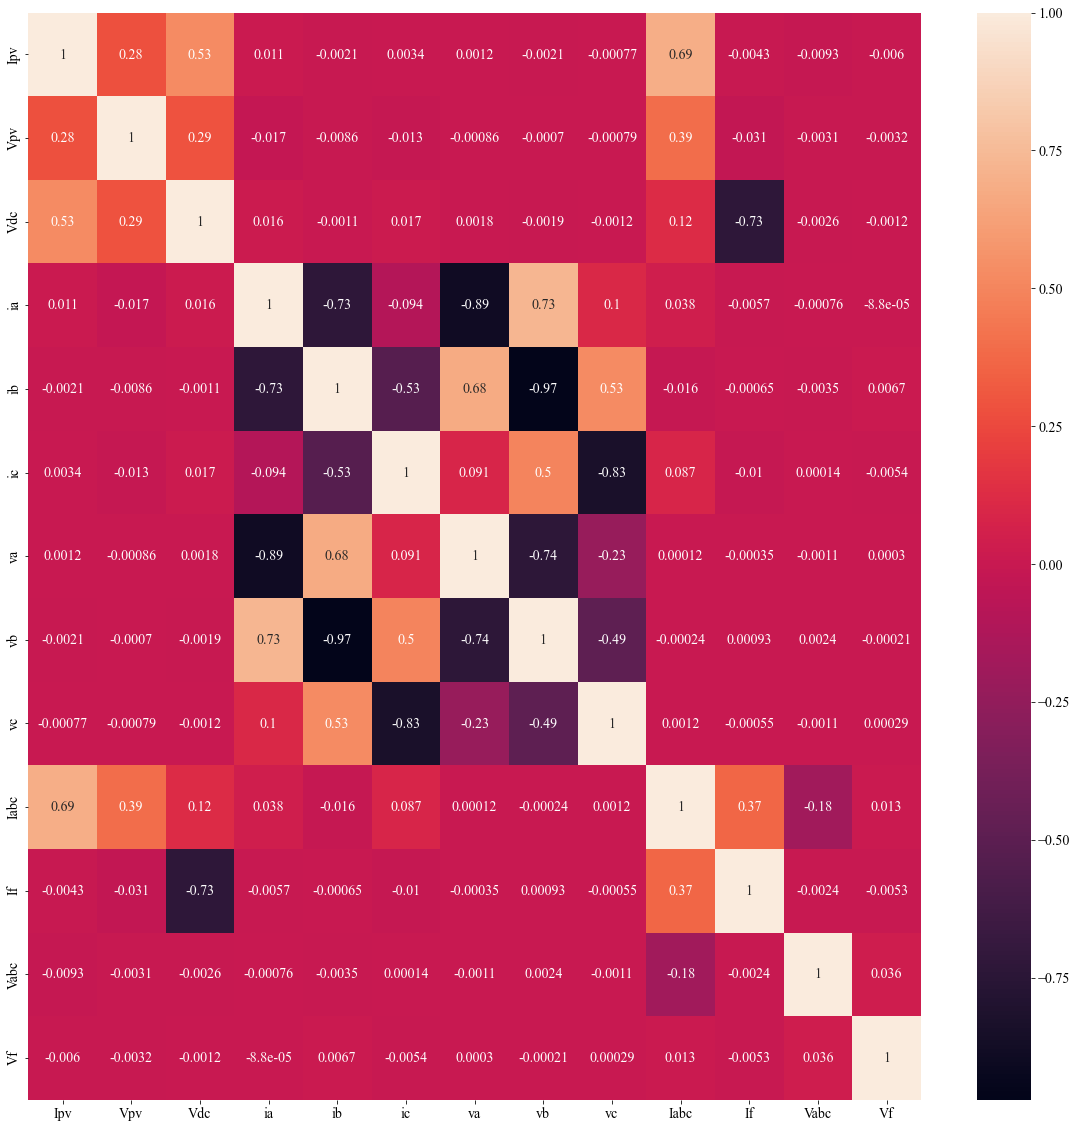

In [14]:
X = df1.iloc[:,1:-1] #Features
Y = df1.iloc[:,-1]   #Traget Labels


plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)
plt.show()

# Data Visualization

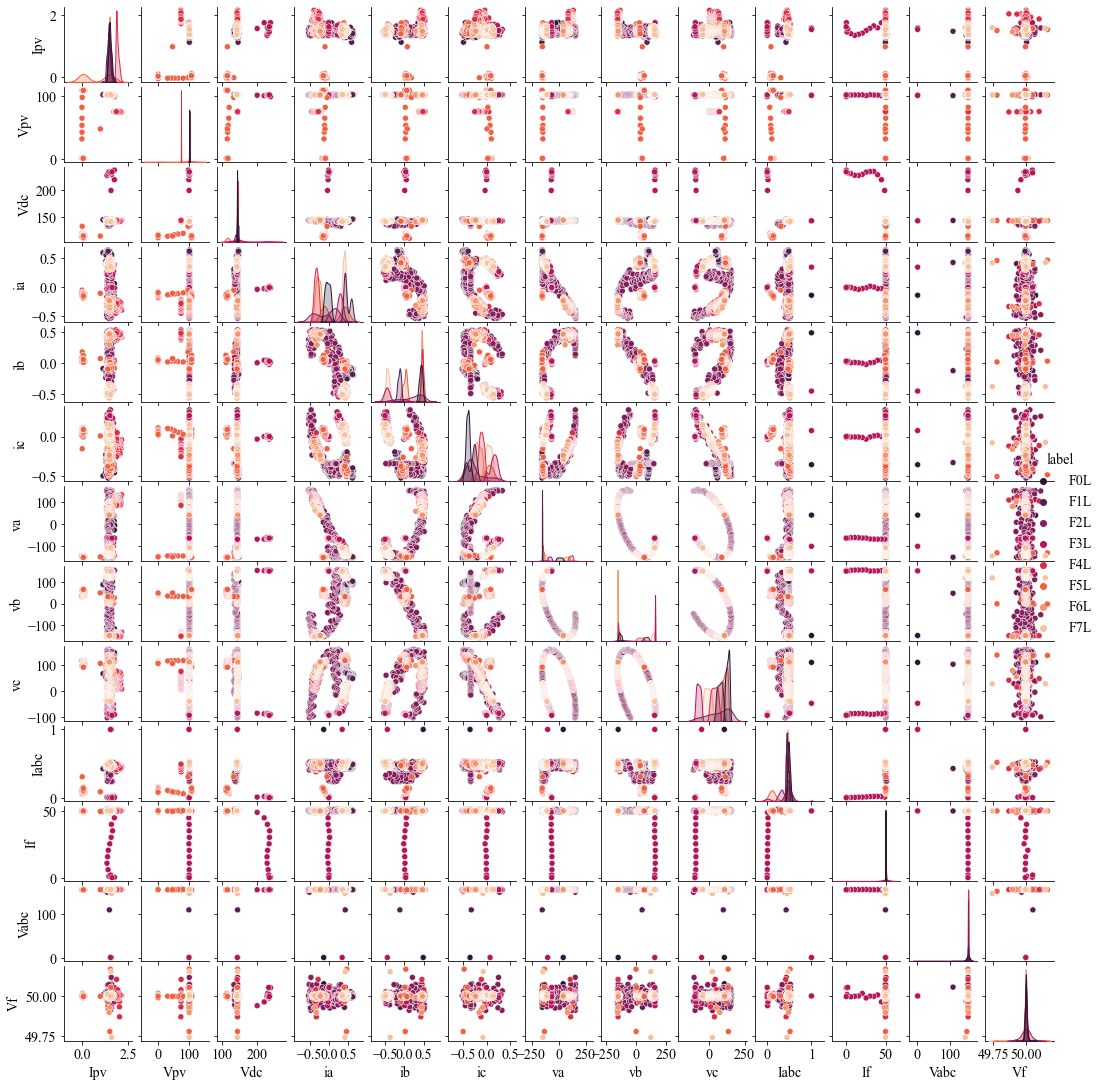

In [17]:
g=sns.pairplot(data=df1.iloc[::10,1:], hue="label",palette='rocket')
g.fig.set_size_inches(15,15)

# Divide the dataset into Train-test split  and do the standard scalling

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

scaler=StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.transform(X_test)

In [28]:
print("The number of samples in the Training set is {}".format(len(X_train)))
print("The number of samples in the Test set is {}".format(len(X_test)))

The number of samples in the Training set is 8748
The number of samples in the Test set is 2187


# Dimensionality Reduction Using PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_sc_train)


PCA(n_components=2)

In [30]:
transformed = pca.transform(X_sc_train)

In [32]:
X_sc_train.shape

(8748, 13)

In [31]:
transformed

array([[ 2.71173733,  0.19555586],
       [ 2.19982495, -0.01608657],
       [ 2.2714138 , -0.29929473],
       ...,
       [-2.02034489, -1.27204407],
       [ 1.853214  , -0.87073952],
       [-0.52644802, -1.64781822]])

In [33]:
pca.explained_variance_ratio_

array([0.27521013, 0.1683151 ])

In [34]:
for i in range (1,14):
    pca = PCA(n_components=i)
    # prepare transform on dataset
    pca.fit(X_sc_train)
    # apply transform to dataset
    transformed = pca.transform(X_sc_train)
    print("Cummulative explained variance for {}-component: {} ".format(i,np.sum(pca.explained_variance_ratio_)))
    print("")


Cummulative explained variance for 1-component: 0.2752101258365788 

Cummulative explained variance for 2-component: 0.4435252237159527 

Cummulative explained variance for 3-component: 0.6045657750592788 

Cummulative explained variance for 4-component: 0.7405215227124423 

Cummulative explained variance for 5-component: 0.817798117253666 

Cummulative explained variance for 6-component: 0.8947187058387618 

Cummulative explained variance for 7-component: 0.9540728305385485 

Cummulative explained variance for 8-component: 0.9720747170076267 

Cummulative explained variance for 9-component: 0.9854772345070749 

Cummulative explained variance for 10-component: 0.9932928426156609 

Cummulative explained variance for 11-component: 0.9982144162519724 

Cummulative explained variance for 12-component: 0.9999864263174316 

Cummulative explained variance for 13-component: 1.0 



## PCA with 2 components Visualization

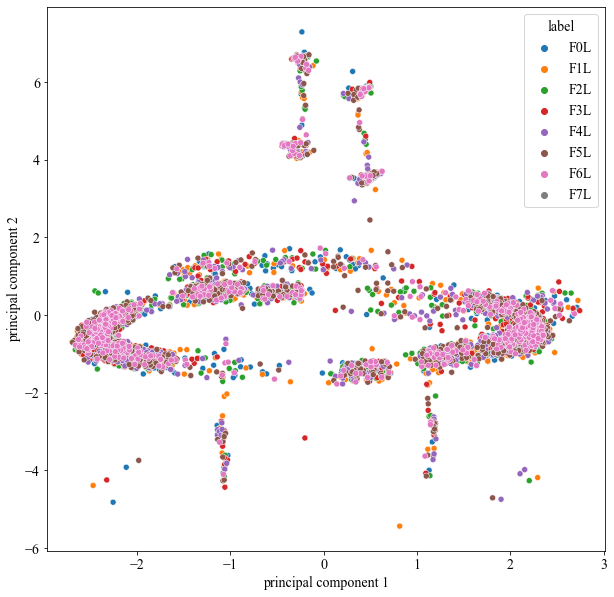

In [35]:
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(X_sc_train)
# apply transform to dataset
transformed = pca.transform(X_sc_train)
#Make a data Frame
principalDf = pd.DataFrame(data = transformed
             , columns = ['principal component 1', 'principal component 2'])
# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=principalDf['principal component 1'],y=principalDf['principal component 2'],hue=y_train)
plt.show()

## PCA with 3 components Visualization

In [37]:
pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X_sc_train)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(y_train)

In [40]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt


fig = plt.figure(figsize=(20,20))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = y_train.unique()
colors = ['g', 'r','b','y','c','m','k']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(y_train.unique())

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()